# Medical Health Insurance Cost Prediction
Medical Health Insurance Cost Prediction with python using Different Regression Models.


## Project Description

In this project, we aim to predict medical health insurance costs for individuals based on various factors such as age, sex, BMI, number of children, smoking habits, and region. The project involves the following steps:

1. **Data Loading and Overview**: The project begins by loading the dataset containing information about individuals and their insurance costs.

2. **Exploratory Data Analysis**: We analyze the dataset to gain insights into the data distribution, relationships between variables, and identify potential patterns.

3. **Data Preprocessing**: Data preprocessing steps are performed, including handling missing values, encoding categorical variables, and scaling numerical features.

4. **Regression Models**: Several regression models are implemented, including Multiple Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regressor, Random Forest Regressor, and Polynomial Regression.

5. **Model Evaluation**: The models are evaluated using metrics such as Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error. The performance of each model is compared.

6. **Conclusion**: The project concludes with a summary of key insights obtained from the analysis and suggestions for further improvement.

## Requirements

1. **Python**

2. **Integrated Development Environment (IDE)**: You can use IDEs like **Jupyter Notebook**, **PyCharm**, **Visual Studio Code**, or any other of your preference.

3. **Dataset**: Collect the dataset containing medical records, including factors like age, gender, BMI, number of dependents, smoking status, region, and charges.

4. **Data Preprocessing Libraries**: You might need libraries like **Pandas** for data manipulation and cleaning, and **NumPy** for numerical operations.

5. **Data Visualization Libraries**: Consider using libraries like **Matplotlib** and **Seaborn** for visualizing the data distribution, trends, and anomalies.

6. **Statistical Libraries**: Depending on your project's needs, **Scipy** might be useful for advanced statistical operations.

7. **Machine Learning Libraries**: You will likely need **Scikit-learn** for standard machine learning algorithms and **TensorFlow** or **PyTorch** for any deep learning implementations.

8. **Regression Algorithms**: Implementing a project on insurance cost prediction will require a variety of regression algorithms such as Linear Regression, **Ridge** and **Lasso** Regression, **Decision Tree** Regression, **Random Forest** Regression, and possibly more advanced techniques based on your research.

9. **Model Evaluation Tools**: Libraries like **Scikit-learn** contain useful functions for evaluating your regression models, including metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and **R-squared**.

10. **Data Preprocessing Tools**: You might need tools like **Scikit-learn**'s `Pipeline` and `preprocessing` module for efficiently handling data preprocessing tasks.

11. **Model Deployment (Optional)**: If you plan to deploy the trained models, you might need libraries like **Flask** or **FastAPI** for creating APIs.



## Dataset

The dataset used for this project contains information about individuals' attributes and their corresponding medical insurance costs. The attributes include age, sex, BMI, number of children, smoking habits, and region. The dataset is loaded and explored using Python's pandas library.
### Dataset Source: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [1]:
# !pip install sklearn

# !pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

## Data Preprocessing

Data preprocessing involves handling missing values, encoding categorical variables, and scaling numerical features. Label encoding and one-hot encoding are used for categorical variables. Additionally, feature scaling is performed to ensure that numerical features are on similar scales.


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there's no any null values

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is performed to understand the distribution of variables and identify relationships. Visualizations using libraries such as seaborn, matplotlib, and plotly are used to create various plots and graphs.


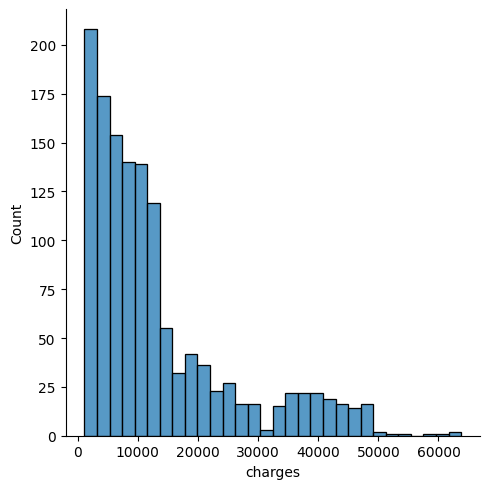

In [10]:
#WE CAN APPLY LOG TRANSFORM TO CORREST SKEWNESS

skewed = sns.displot(df['charges']) #Charges is right-skewed
skewed

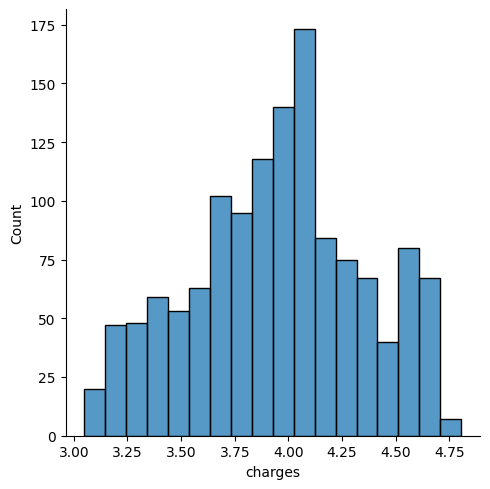

In [11]:
log_trans = sns.displot(np.log10(df['charges'])) #skewness is corrected using log
log_trans


In [12]:
#CHARGES BY REGION
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

<Axes: xlabel='region', ylabel='charges'>

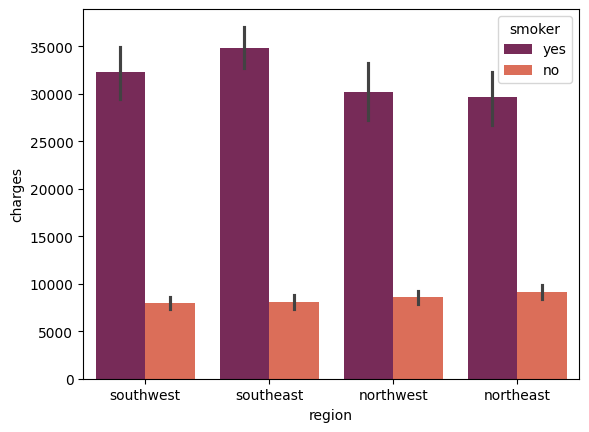

In [13]:

#WE CHECK THE CHARGES BY REGION WHO ARE SMOKERS

sns.barplot(data = df, x = 'region', y = 'charges', hue = 'smoker', palette = 'rocket' )

<Axes: xlabel='children', ylabel='charges'>

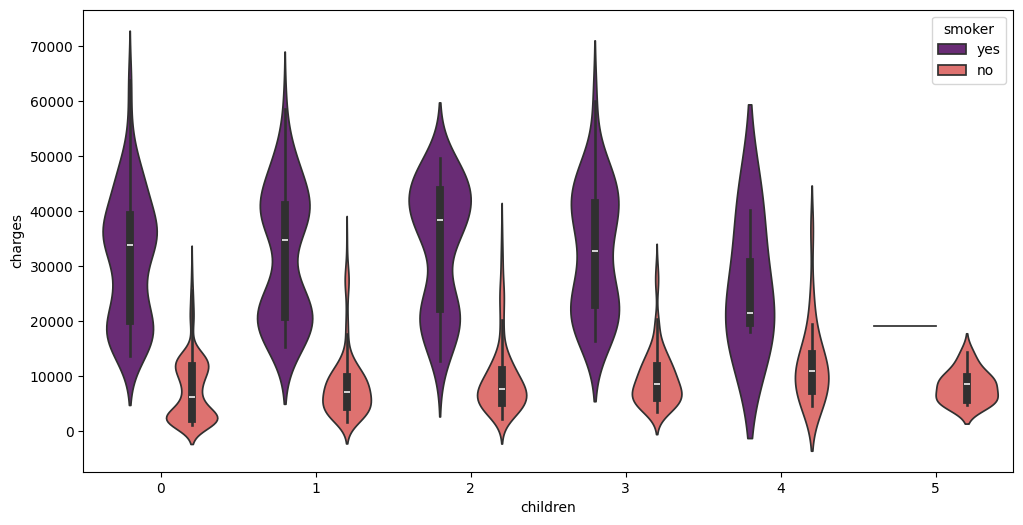

In [14]:
plt.figure(figsize=(12,6))
sns.violinplot(data = df, x = 'children', y = 'charges', hue = 'smoker', split = False, palette = 'magma') 

<Axes: xlabel='region', ylabel='charges'>

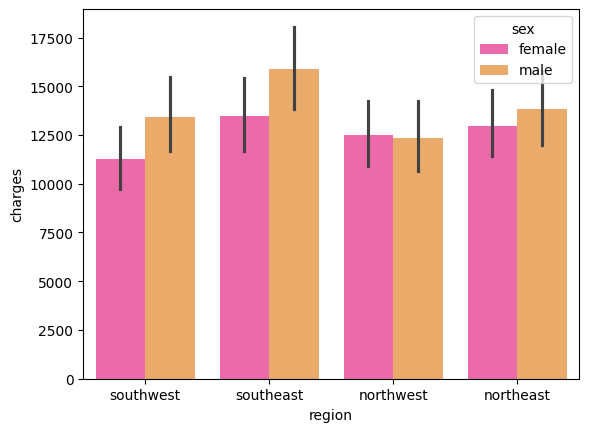

In [15]:
#WE CHECK THE CHARGES BY REGION BY THIER GENDER
sns.barplot(data = df, x='region', y='charges', hue='sex', palette='spring')

<Axes: xlabel='region', ylabel='charges'>

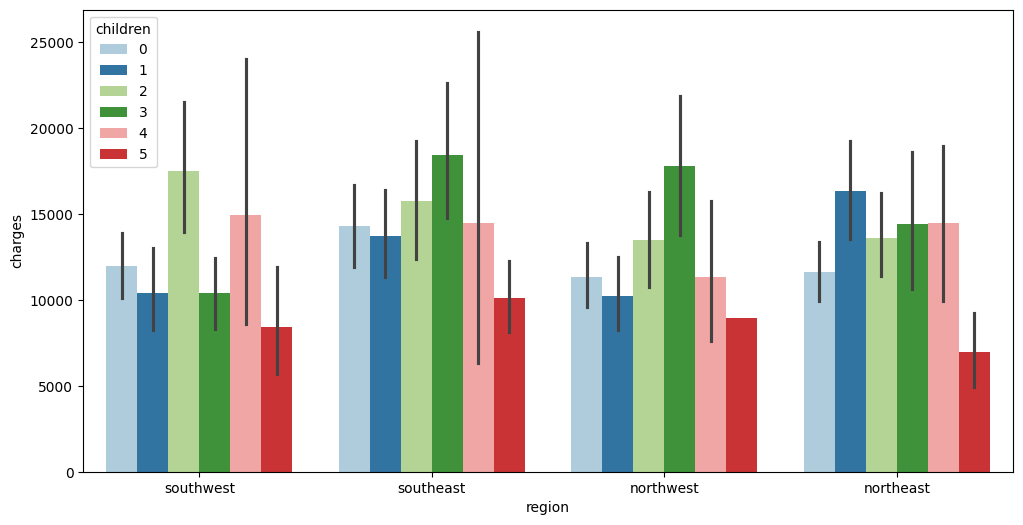

In [16]:
#WE CHECK THE CHARGES BY REGION BY THE CHILDREN AVAILABLE
plt.figure(figsize=(12,6))
sns.barplot(data = df, x = 'region', y= 'charges',  hue = 'children', palette='Paired')
 

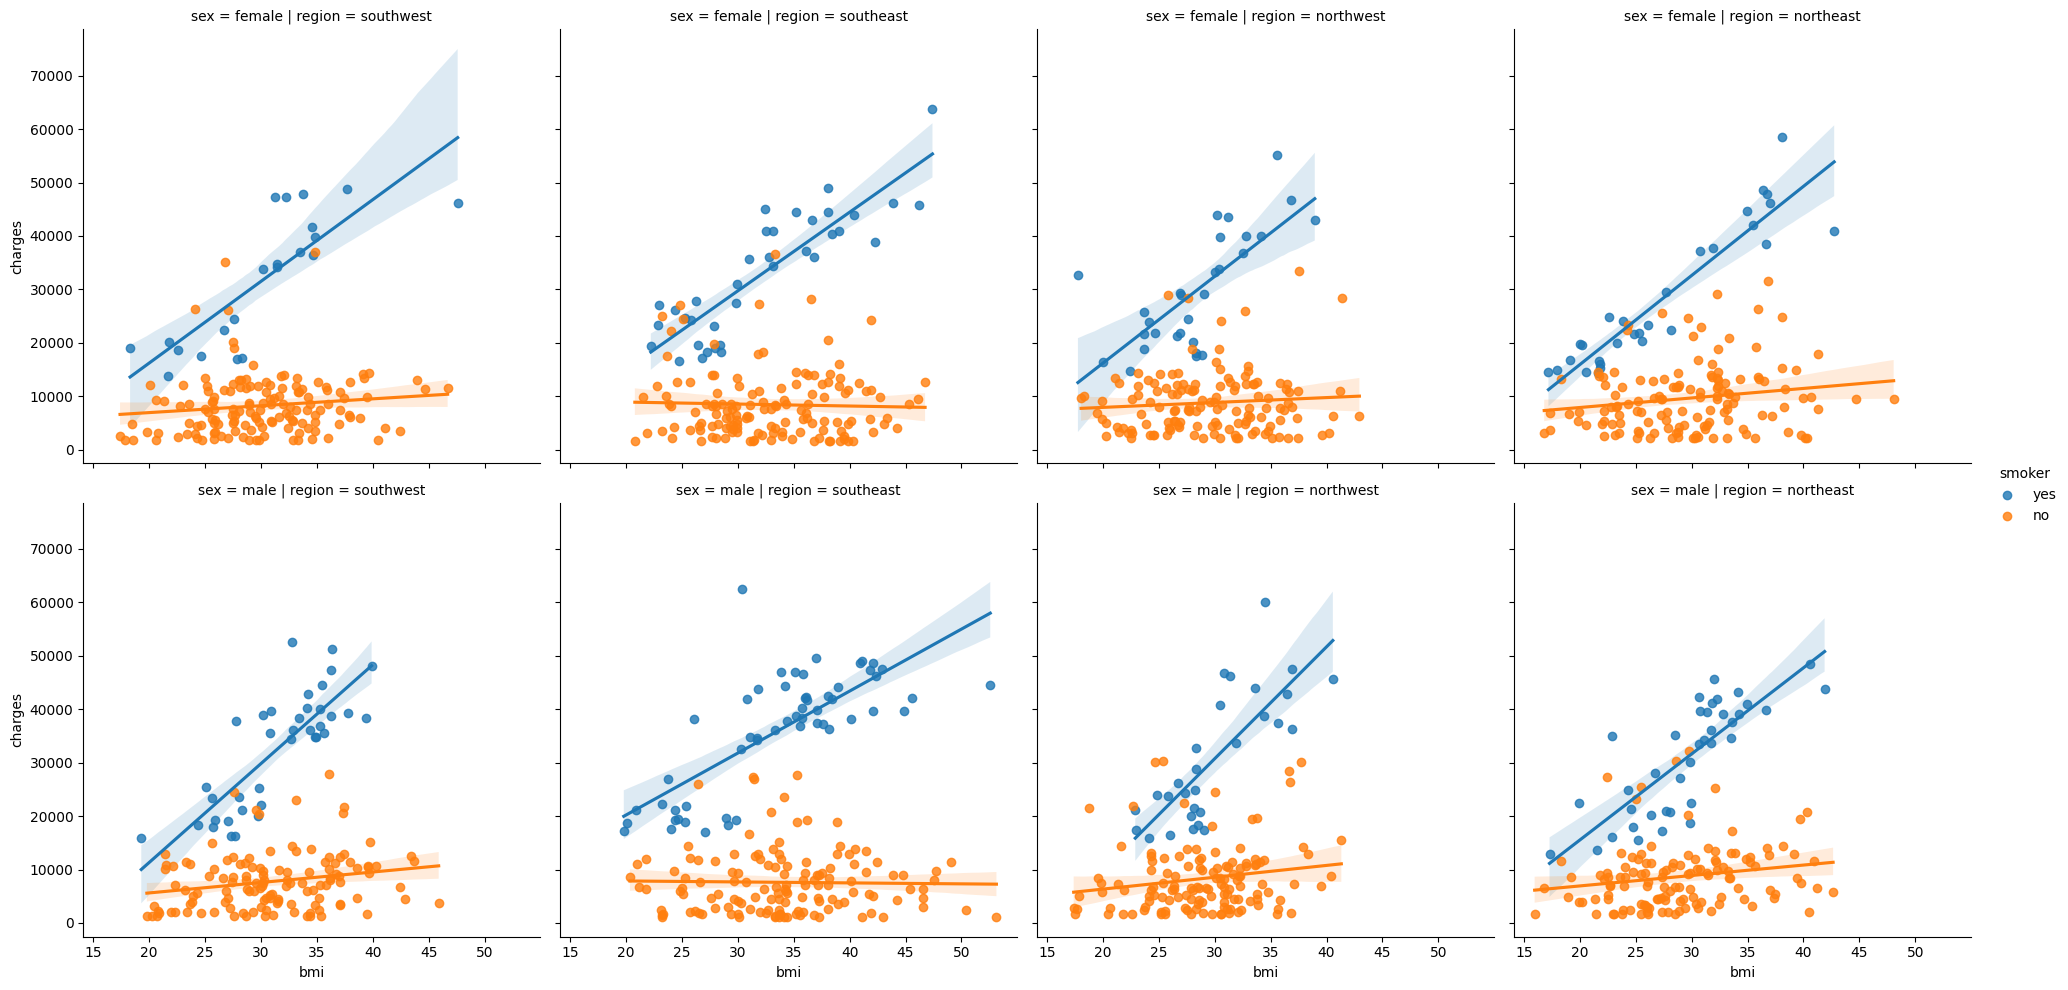

In [17]:
#regression plot to understand the relationship between the bmi and charges considering
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)


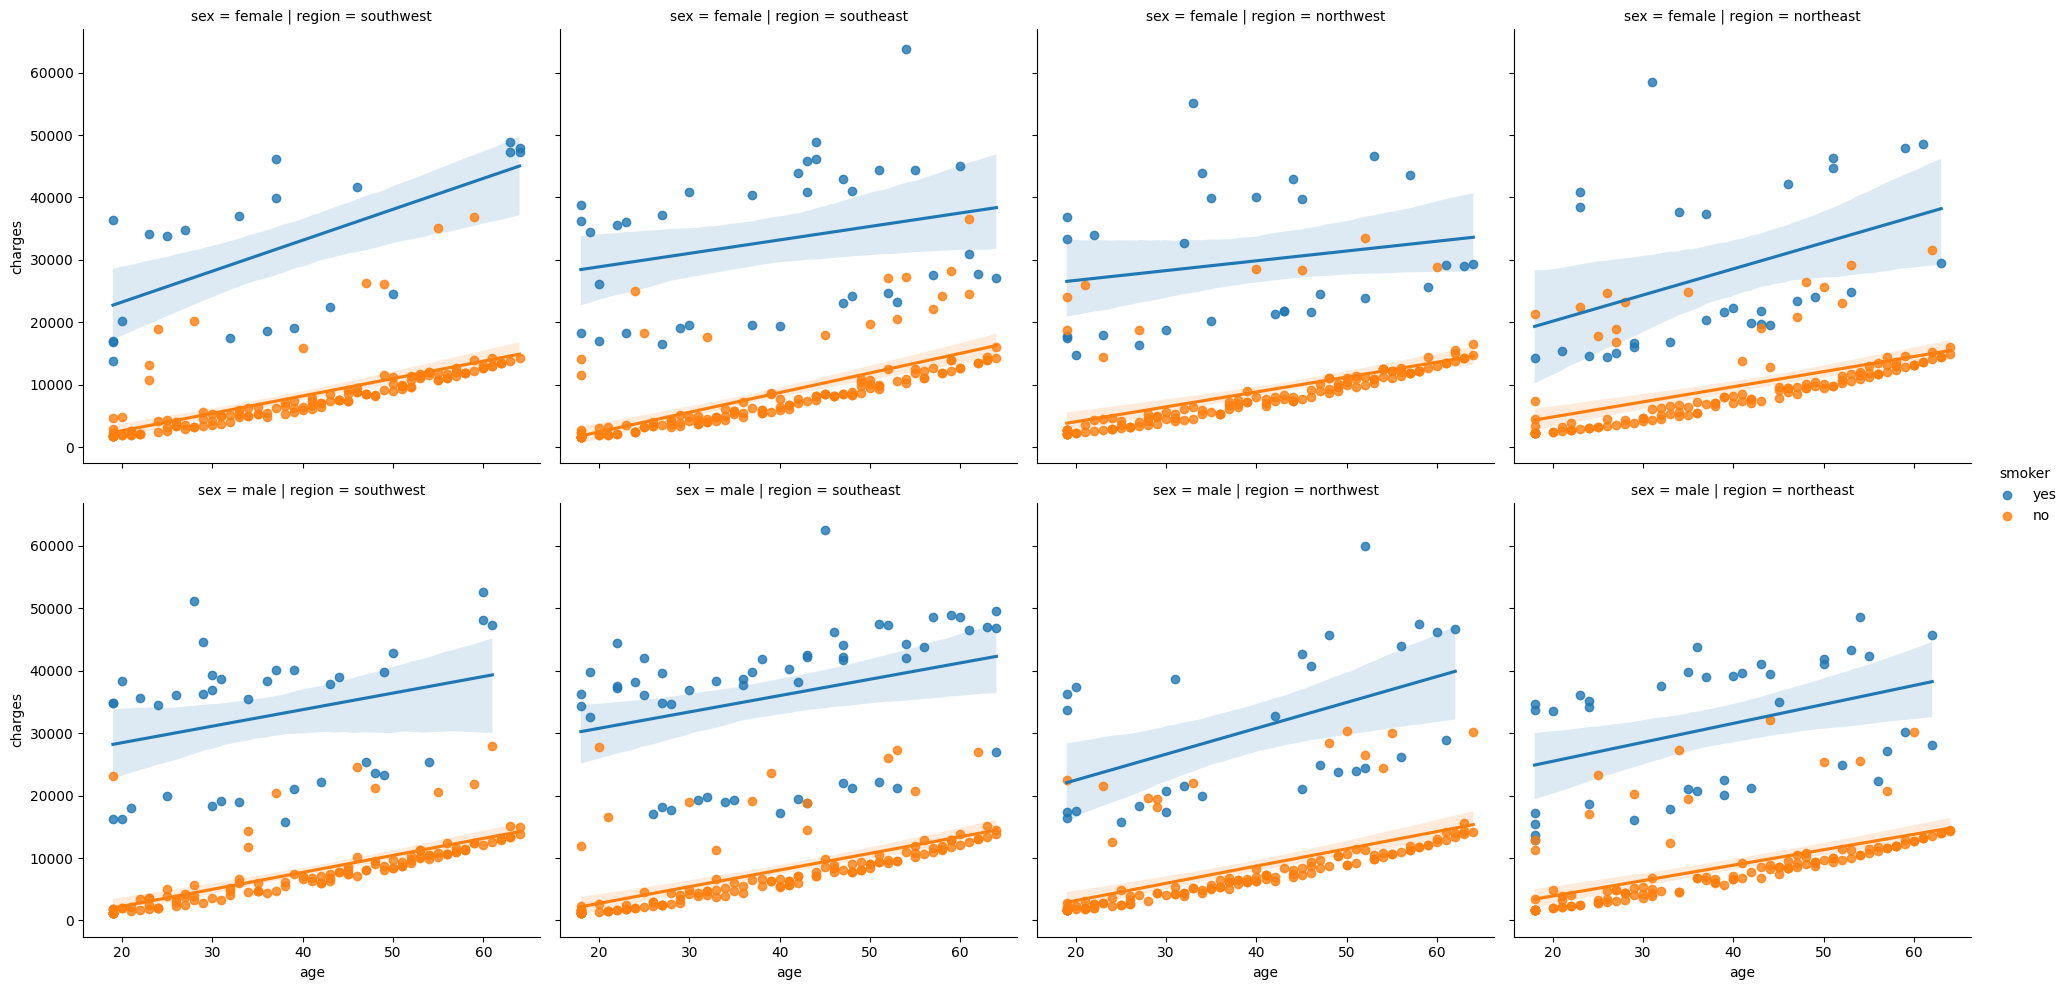

In [18]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)


From the chart above we can see that those who are smokers get a higher medical insurance charges than
those that are none smoker


In [19]:


# Convert object labels to categorical data type
df[['sex', 'region', 'smoker']] = df[['sex', 'region', 'smoker']].astype('category')

# Check the updated data types
print(df.dtypes)


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [20]:
# Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

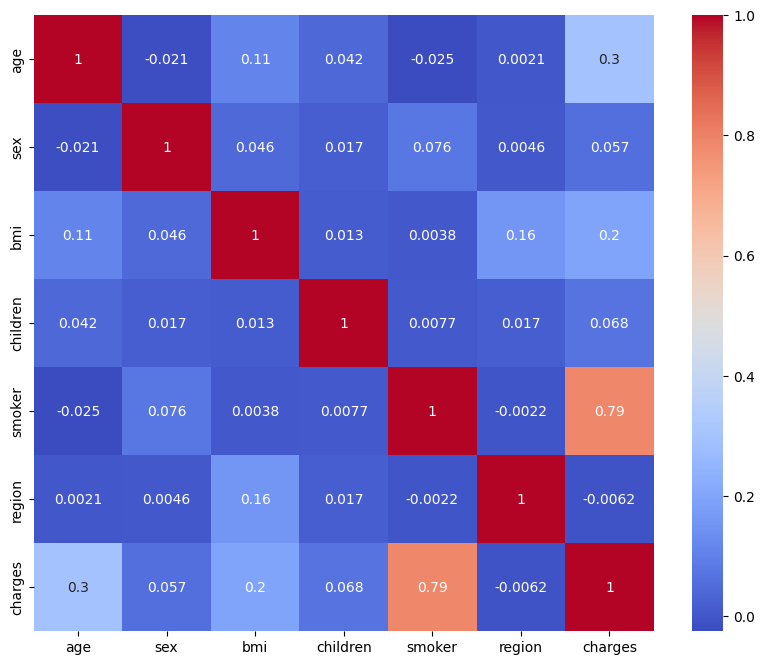

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


In [23]:

#we split our model
x = df.drop(['charges'], axis = 1)
y = df['charges']


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
%pip install statsmodels

import statsmodels.api as sm #WE GET THE STATISTICAL MODEL
#add constant to predictor variables
x2 = sm.add_constant(x_train)
#fit linear regression model
model = sm.OLS(y_train, x2).fit()



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 7.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 8.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.9 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ---------------

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          2.71e-308
Time:                        16:46:54   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.000   -1.41e+04   -9813.820
age          257.0563     13.452     19.109      0.000     230.661     283.451
sex          -18.7915    375.770     -0.050      0.960    -756.126     718.543
bmi          335.7815     31.655     10.607      0.000     273.668     397.895
children     425.0915    154.431      2.753      0.006     122.067     728.116
smoker      2.365e+04    465.245     50.829      0.000    2.27e+04    2.46e+04
region      -271.2843    170.373     -1.592      0.112    -605.590      63.022
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Standard Errors:**
- [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

**R-squared: 0.747**
- The coefficient of determination.
- Proportion of variance in the response variable explained by predictor variables.
- 74.7% of the variation in exam scores explained by hours studied and prep exams taken.

**F-statistic: 523.6**
- Overall F-statistic for the regression model.

**Prob (F-statistic): 3.16e-313**
- p-value associated with the overall F-statistic.
- Determines if the regression model is statistically significant.
- p-value < 0.05 indicates a significant association of predictor variables with the response variable.

**coef:**
- Coefficients for each predictor variable.
- Represents average expected change in the response variable, with other predictors constant.

**P>|t|:**
- Individual p-values for each predictor variable.
- Indicates statistical significance.
- Statistically significant at α < 0.05, not significant at α >= 0.05.
- Example: "sex" not statistically significant, may be removed from the model.


## Regression Models

Multiple regression models are implemented to predict insurance costs.

## MULTIPLE LINEAR REGRESSION MODEL

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()



In [29]:
lm.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [31]:

coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df


,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [32]:
#WE PREDICT OUR MODEL
y_pred1 = lm.predict(x_test)


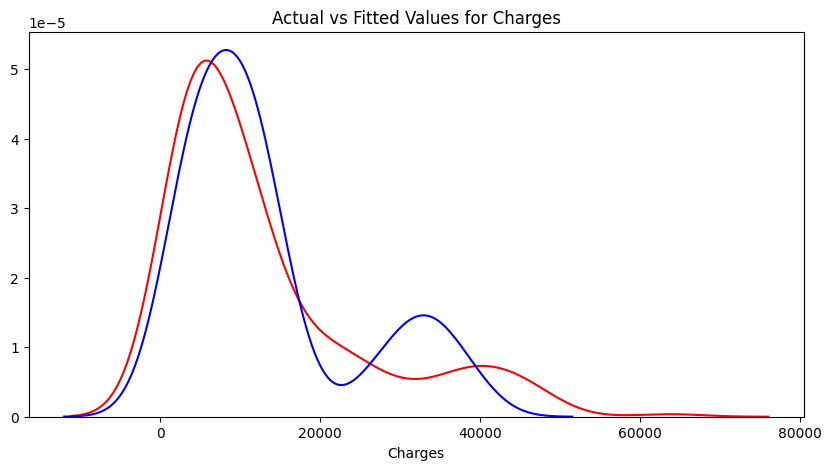

In [33]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

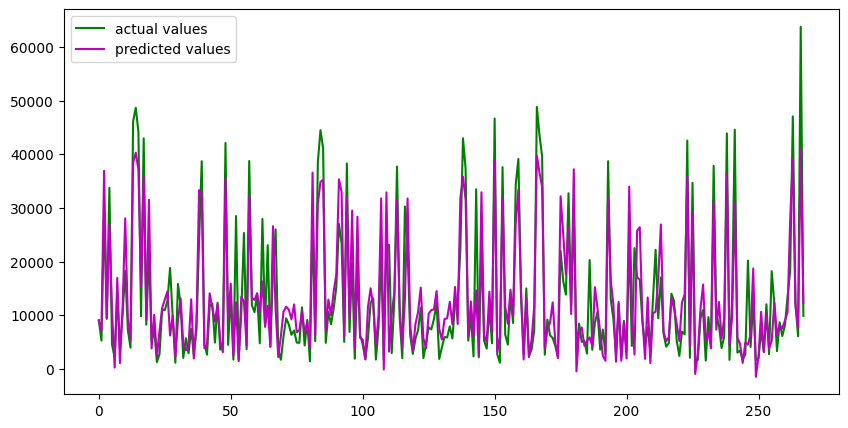

In [34]:
## ANOTHER PLOTTING TECHNIQUE

plt.figure(figsize=(10, 5))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred1, c='m',label="predicted values")
plt.legend()
plt.show()

In [35]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()


,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


## LASSO REGRESSION MODEL


In [36]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold


In [37]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKF
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(x_train, y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,"(0.1, ...)"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,RepeatedKFold...dom_state=101)
,verbose,False
,n_jobs,-1


In [38]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [39]:

#WE PREDICT OUR LASSOCV REGRESSION MODEL
y_pred2 = lasso_model.predict(x_test)


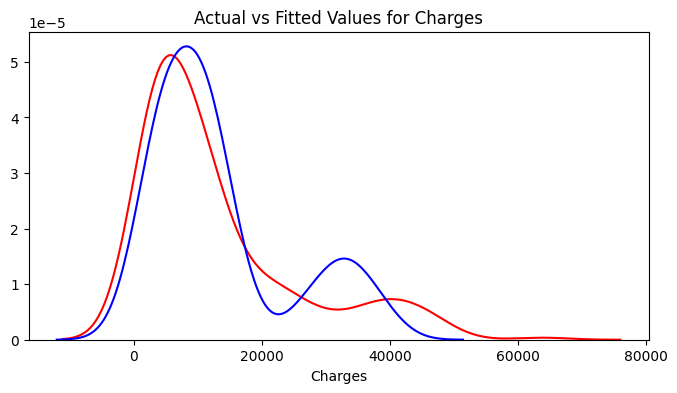

In [40]:
# Visualising the Lasso Regression results
plt.figure(figsize=(8, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()


In [41]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()


,Actual,Predicted
764,9095.06825,8911.659191
887,5272.17580,7123.036794
890,29330.98315,36852.479165
1293,9301.89355,9515.428284
259,33750.29180,26976.771303


## RIDGE REGRESSION MODEL


In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [43]:
#define cross-validation method to evaluate model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101) 

#define model
rid_model = RidgeCV(alphas=(0.1,  1.0,  10.0), cv=cv, scoring='neg_mean_absolute_error')
#fit model
rid_model.fit(x_train, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,'neg_mean_absolute_error'
,cv,RepeatedKFold...dom_state=101)
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [44]:

print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(x_test, y_test))

-11943.455858669682
[ 2.57035723e+02 -1.80109296e+01  3.35782790e+02  4.25136864e+02
  2.36341868e+04 -2.71303705e+02]
0.7833217621706015


In [45]:
#WE PREDICT OUR RIDGECV REGRESSION MODEL
y_pred3 = rid_model.predict(x_test)


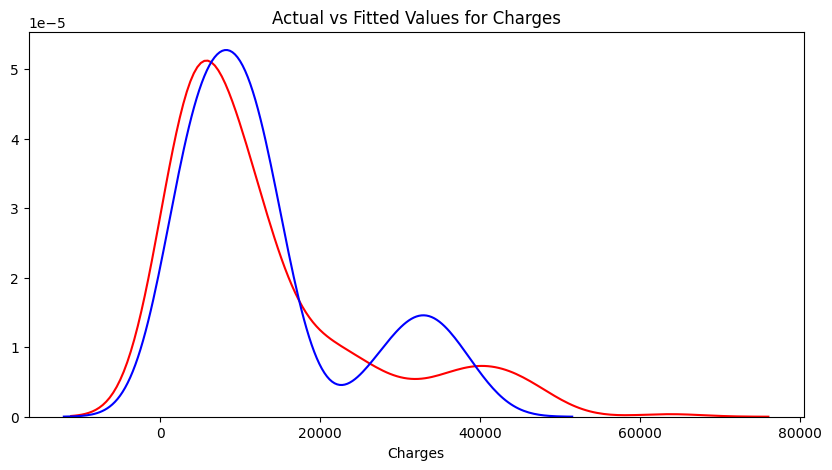

In [46]:
# Visualising the Ridge Regression results
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [47]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()


,Actual,Predicted
764,9095.06825,8926.757144
887,5272.17580,7118.725826
890,29330.98315,36897.233767
1293,9301.89355,9511.011287
259,33750.29180,27003.281662


## ELASTICNET REGRESSOR


In [48]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [49]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
net_model = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, max_iter=1000, random_state=1) 

# evaluate model
scores = cross_val_score(net_model, x_train,y_train, scoring='neg_mean_absolute_error', cv=cv)

net_model.fit(x_train, y_train)



,alpha,0.1
,l1_ratio,0.9
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,1
,selection,'cyclic'


In [50]:
print(net_model.intercept_)
print(net_model.coef_)
print(net_model.score(x_test, y_test))

-11626.875213341189
[  254.98398073    56.64093616   335.90294961   429.44085068
 22273.01597223  -273.05052278]
0.7789260673175409


In [51]:
y_pred4 = net_model.predict(x_test)


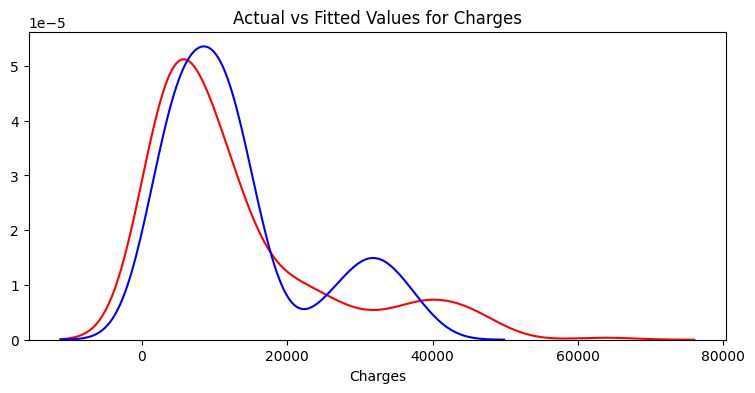

In [52]:
# Visualising the ElasticNet Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()


In [53]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predicted4.head()


,Actual,Predicted
764,9095.06825,9162.642377
887,5272.17580,7363.304117
890,29330.98315,35722.815803
1293,9301.89355,9822.122303
259,33750.29180,25996.448958


## RANDOM FOREST REGRESSOR


In [54]:
from sklearn.ensemble import RandomForestRegressor


In [55]:

Ram_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2)
# fit the regressor model
Ram_reg.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
print(Ram_reg.score(x_test, y_test))


0.8627890343946443


In [57]:
y_pred5 = Ram_reg.predict(x_test)


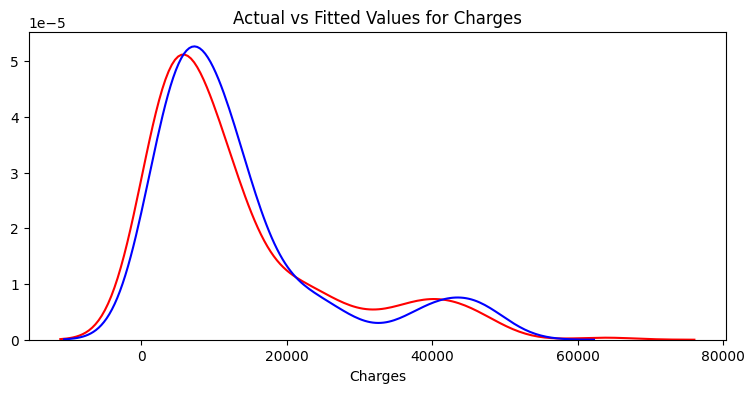

In [58]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()


In [59]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

,Actual,Predicted
764,9095.06825,11954.195579
887,5272.17580,5048.880709
890,29330.98315,28413.437139
1293,9301.89355,10435.628015
259,33750.29180,34537.094773


## WE TRY SELECT THE BEST FEATURES USING FEATURE IMPORTANCE FROM RANDOM FOREST REGRESSOR

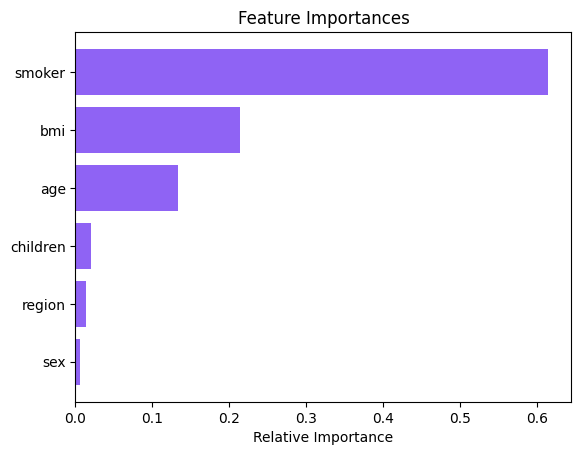

In [60]:
features = x.columns
importances = Ram_reg.feature_importances_
indices = np.argsort(importances)



plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


We can see that the smoker, bmi and age are more important features compared to the other features.


In [61]:
#We select the import features
x = df.drop(['charges', 'region', 'sex'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [62]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


#### WE BUILD A MODEL USING THE POLYNOMIAL REGRESSION AFTER FEATURE IMPORTANCE


## POLYNOMIAL REGRESSION MODEL


In [63]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree=2)

x_poly = poly_reg.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 0)

In [64]:
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Generate a statsmodels OLS summary for the polynomial regression (training set)
import statsmodels.api as sm

# x_train is already the polynomial-transformed training data (numpy array)
# Add a constant column for the intercept
X_sm = sm.add_constant(x_train)

# Fit OLS and print the summary
ols_poly = sm.OLS(y_train, X_sm).fit()
print(ols_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     403.2
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:52:12   Log-Likelihood:                -10611.
No. Observations:                1070   AIC:                         2.125e+04
Df Residuals:                    1056   BIC:                         2.132e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5325.8817   3586.737     -1.485      0.1

In [66]:

print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(x_test, y_test))


-5325.881705253518
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345231


In [67]:
#WE PREDICT OUR POLYNOMIAL REGRESSION MODEL
y_pred6 = pol_reg.predict(x_test)

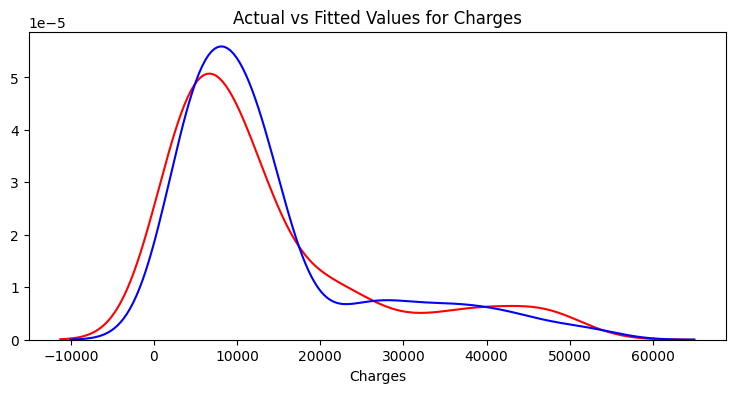

In [68]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()


## Model Evaluation

The performance of each regression model is evaluated using various metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The evaluation results provide insights into the accuracy of the models in predicting insurance costs.


In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score


## MULTIPLE LINEAR REGRESSION


In [70]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 10976.93032415958
Mean Square Error: 225340349.96269003
Root Mean Square Error: 15011.340711698273


## LASSOCV REGRESSION


In [71]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))


Mean Absolute Error: 10968.76909663481
Mean Square Error: 224915279.38457984
Root Mean Square Error: 14997.17571359954


## RIDGECV REGRESSION


In [72]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))


Mean Absolute Error: 10975.462165520714
Mean Square Error: 225254498.69396153
Root Mean Square Error: 15008.480892280922


## ELASTICNET REGRESSION


In [73]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))


Mean Absolute Error: 10838.727060068726
Mean Square Error: 216982294.5125357
Root Mean Square Error: 14730.31888699412


## RANDOM FOREST REGRESSOR


In [74]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))


Mean Absolute Error: 11523.25946644571
Mean Square Error: 267924204.81937626
Root Mean Square Error: 16368.390416268066


## POLYNOMIAL REGRESSION


In [75]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))


Mean Absolute Error: 2824.4950454776445
Mean Square Error: 18895160.09878035
Root Mean Square Error: 4346.856346692441


From the model evaluation score, we can see that polynomial regression and the Random Forest
Regressor are performing well than the other models.


## Key Insights


1. **Feature Importance:** After analyzing the dataset, we found that the most influential factors affecting medical insurance charges are whether the person is a smoker, their BMI (Body Mass Index), and their age.

2. **Smoking Impact:** Smokers tend to have significantly higher medical insurance charges compared to non-smokers. This is a crucial insight that highlights the importance of lifestyle choices on healthcare costs.

3. **Age and Charges:** The age of an individual is positively correlated with insurance charges. Older individuals tend to have higher medical costs, which is understandable given the increased likelihood of health issues as age advances.

4. **BMI Influence:** Higher BMI values are associated with increased medical insurance charges. This suggests that maintaining a healthy weight can positively impact healthcare costs.

5. **Model Performance:** We evaluated multiple regression models including Multiple Linear Regression, LassoCV, RidgeCV, ElasticNet, Random Forest Regressor, and Polynomial Regression. Among these, Polynomial Regression and Random Forest Regressor showed better performance in predicting medical insurance charges.

6. **Polynomial Model Advantage:** The Polynomial Regression model showed the lowest Mean Absolute Error, Mean Square Error, and Root Mean Square Error among all models, indicating its capability to better capture the underlying patterns in the data.
